In [6]:
library(readr)
library(tidyr)
library(stringr)
library(dplyr)
library(ggplot2)
library(lfe)

In [7]:
df <- data.table::fread('/pool001/mfzhao/PROCESSED_DATA/dyadic_mvmt_2020.csv')

In [8]:
df %>%
    mutate(D_o = str_sub(D, 1, 3),
           D_d = str_sub(D, -3, -1)) -> df

In [104]:
df %>%
    filter(bordering == 1) -> dfb

In [119]:
fit1 <- felm(log(ood) ~ D_o + D_d | dyad + date | 0 | origin_cluster + destination_cluster, df)
fit2 <- felm(log(pod) ~ D_o + D_d | dyad + date | 0 | origin_cluster + destination_cluster, df, weights = dfb$weights)
fit3 <- felm(log(ood) ~ D_o + D_d | dyad + date | 0 | origin_cluster + destination_cluster, dfb)
fit4 <- felm(log(pod) ~ D_o + D_d | dyad + date | 0 | origin_cluster + destination_cluster, dfb, weights = dfb$weights)

In [122]:
as.data.frame(summary(fit1)$coef) %>%
    mutate(var = rownames(.),
           dv = 'log_ndotd') %>%
    bind_rows(as.data.frame(as.data.frame(summary(fit2)$coef) %>%
                  mutate(var = rownames(.),
                         dv = 'log_pdotd'))) %>%
    mutate(bordering = 'N') -> temp1

as.data.frame(summary(fit3)$coef) %>%
    mutate(var = rownames(.),
           dv = 'log_ndotd') %>%
    bind_rows(as.data.frame(as.data.frame(summary(fit4)$coef) %>%
                  mutate(var = rownames(.),
                         dv = 'log_pdotd')))  %>%
    mutate(bordering = 'Y') -> temp2

bind_rows(temp1, temp2) -> temp

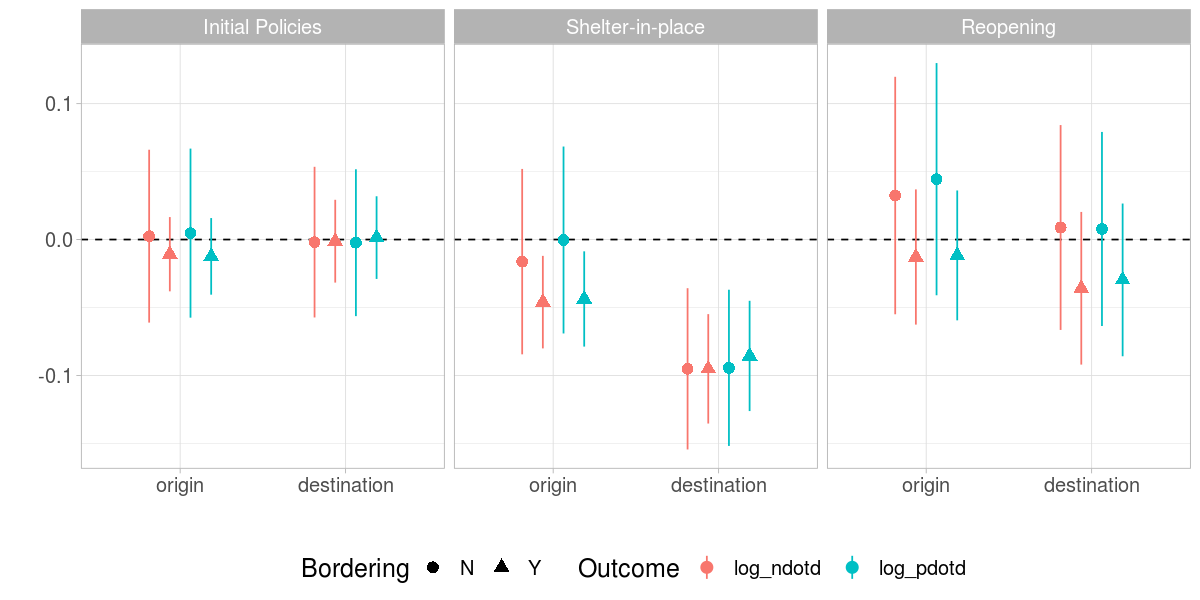

In [124]:
colnames(temp) <- c('estimate', 'se', 't', 'p', 'var', 'dv', 'bordering')
pn <- c('p1' = "Initial Policies",
        'p2' = "Shelter-in-Place",
        'p3' = "Reopening")
options(repr.plot.width=10, repr.plot.height=5)

temp %>%
    mutate(od = ifelse(str_detect(var, '^D_o'), 'origin', 'destination'),
           od = factor(od, levels = c('origin', 'destination')),
           pp = str_sub(var, -2, -1)) %>%
    ggplot(aes(x = od, y = estimate, color = dv, shape = bordering)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 3) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) + 
    facet_grid(. ~ pp, labeller = as_labeller(pn)) + 
    xlab('') + 
    ylab('') +
    labs(shape = 'Bordering', color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=15),
          strip.text.y = element_blank(),
          legend.position = 'bottom')

In [125]:
fit5 <- felm(log(ood) ~ D | dyad + date | 0 | origin_cluster + destination_cluster, df)
fit6 <- felm(log(pod) ~ D | dyad + date | 0 | origin_cluster + destination_cluster, df, weights = df$weights)
fit7 <- felm(log(ood) ~ D | dyad + date | 0 | origin_cluster + destination_cluster, dfb)
fit8 <- felm(log(pod) ~ D | dyad + date | 0 | origin_cluster + destination_cluster, dfb, weights = dfb$weights)

Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”


In [126]:
summary(fit5)$coef %>%
    as.data.frame() %>%
    mutate(var = rownames(.),
           dv = 'log_ndotd',
           var = str_sub(var, 2, -1)) %>%
    separate(var, into = c('origin', 'destination')) %>%
    bind_rows(summary(fit6)$coef %>%
              as.data.frame() %>%
              mutate(var = rownames(.),
                     dv = 'log_pdotd',
                     var = str_sub(var, 2, -1)) %>%
              separate(var, into = c('origin', 'destination'))) %>% 
    mutate(bordering = 'N') -> temp1

summary(fit7)$coef %>%
    as.data.frame() %>%
    mutate(var = rownames(.),
           dv = 'log_ndotd',
           var = str_sub(var, 2, -1)) %>%
    separate(var, into = c('origin', 'destination')) %>%
    bind_rows(summary(fit8)$coef %>%
              as.data.frame() %>%
              mutate(var = rownames(.),
                     dv = 'log_pdotd',
                     var = str_sub(var, 2, -1)) %>%
              separate(var, into = c('origin', 'destination'))) %>% 
    mutate(bordering = 'Y') -> temp2

bind_rows(temp1, temp2) -> temp

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”


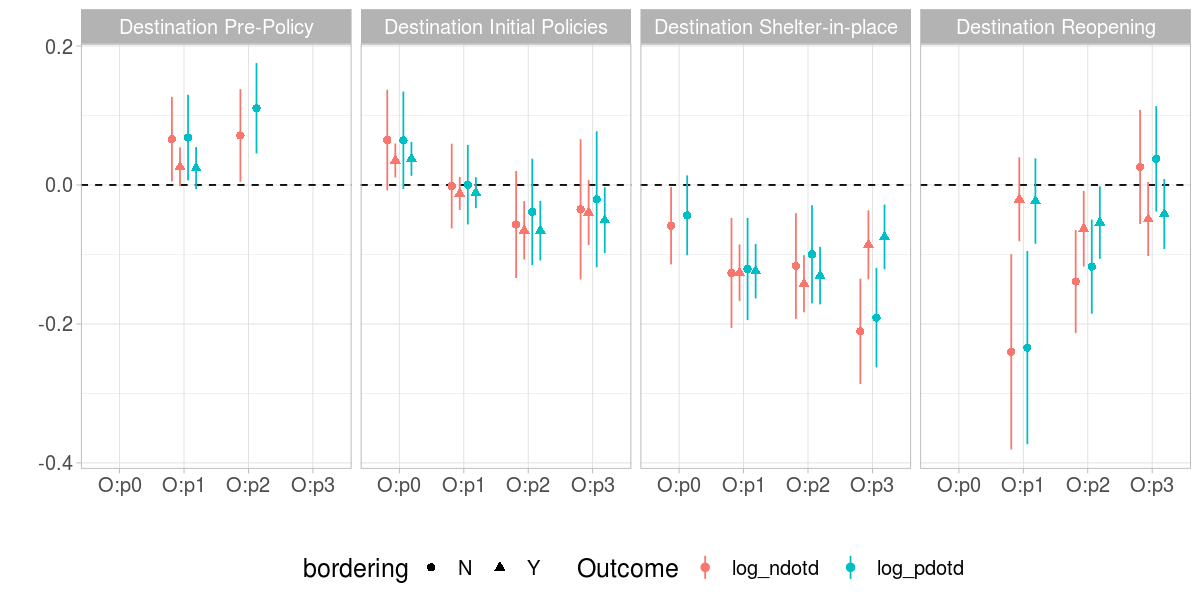

In [128]:
colnames(temp) <- c('estimate', 'se', 't', 'p', 'origin', 'destination', 'dv', 'bordering')
pd <- c('dp0' = 'Destination Pre-Policy',
        'dp1' = "Destination Initial Policies",
        'dp2' = "Destination Shelter-in-Place",
        'dp3' = "Destination Reopening")
options(repr.plot.width=10, repr.plot.height=5)

temp %>%
    mutate(origin = str_replace(origin, 'o', 'O:')) %>%
    ggplot(aes(x = origin, y = estimate, color = dv, shape = bordering)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) + 
    facet_grid(. ~ destination, labeller = as_labeller(pd)) + 
    xlab('') + 
    ylab('') +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=15),
          strip.text.y = element_blank(),
          legend.position = 'bottom')

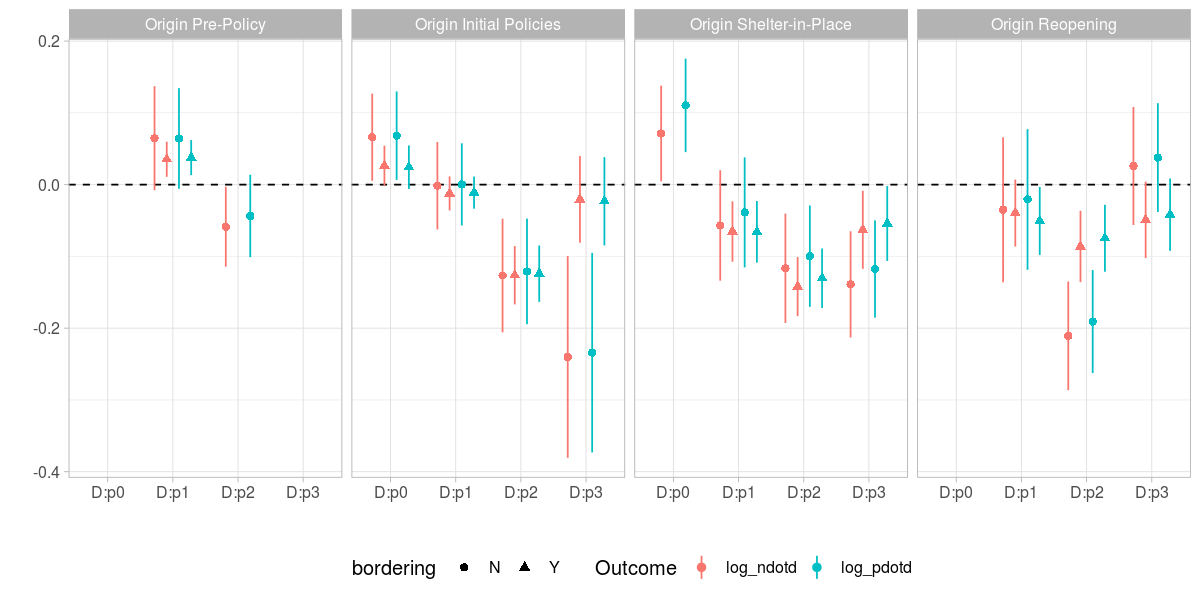

In [179]:
colnames(temp) <- c('estimate', 'se', 't', 'p', 'origin', 'destination', 'dv', 'bordering')
pd <- c('op0' = 'Origin Pre-Policy',
        'op1' = "Origin Initial Policies",
        'op2' = "Origin Shelter-in-Place",
        'op3' = "Origin Reopening")
options(repr.plot.width=10, repr.plot.height=5)

temp %>%
    mutate(destination = str_replace(destination, 'd', 'D:')) %>%
    ggplot(aes(x = destination, y = estimate, color = dv, shape = bordering)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .75), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .75), size = .5) + 
    facet_grid(. ~ origin, labeller = as_labeller(pd)) + 
    xlab('') + 
    ylab('') +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=12),
          strip.text.y = element_blank(),
          legend.position = 'bottom')

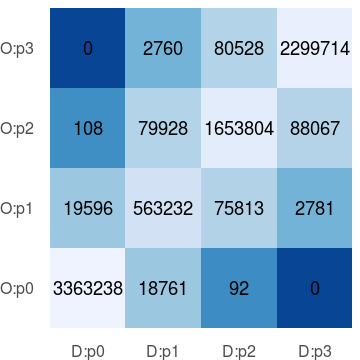

In [176]:
options(repr.plot.width=3, repr.plot.height=3)
counts %>%
    select(-p) %>%
    spread(key = origin, value = n) %>%
    gather(key = 'origin', value = n, -destination) %>%
    replace_na(list(n = 0)) %>%
    mutate(destination = str_replace(destination, 'd', 'D:'),
           origin = str_replace(origin, 'o', 'O:')) %>%
    ggplot(aes(x = destination, y = origin, fill = log(n+1))) + 
    geom_tile() + 
    scale_fill_distiller() +
    geom_text(aes(label = n)) +
    theme_light() +
    theme(text = element_text(size=12),
          legend.position = 'None',
          strip.text.y = element_blank(),
          panel.border=element_blank(),
          panel.grid.major=element_blank(), ## element_line(colour = "white")
          panel.grid.minor=element_blank(), ## element_line(colour = "white", size = 0.25)
          axis.ticks=element_blank(),       ## element_line(colour = "grey20")
          axis.title=element_blank(),      ## axis.title.x = element_text(
          plot.margin= grid::unit(c(0, 0, 0, 0), "in"))

In [195]:
df %>%
    select(dyad) %>%
    distinct() %>%
    left_join(df %>%
              filter(D == 'op3-dp3') %>%
              group_by(dyad) %>%
              tally()) %>%
    replace_na(list(n = 0)) %>%
    mutate(roq = ntile(n, 5)) %>%
    select(-n) %>%
    left_join(df) -> temp

Joining, by = "dyad"

Joining, by = "dyad"



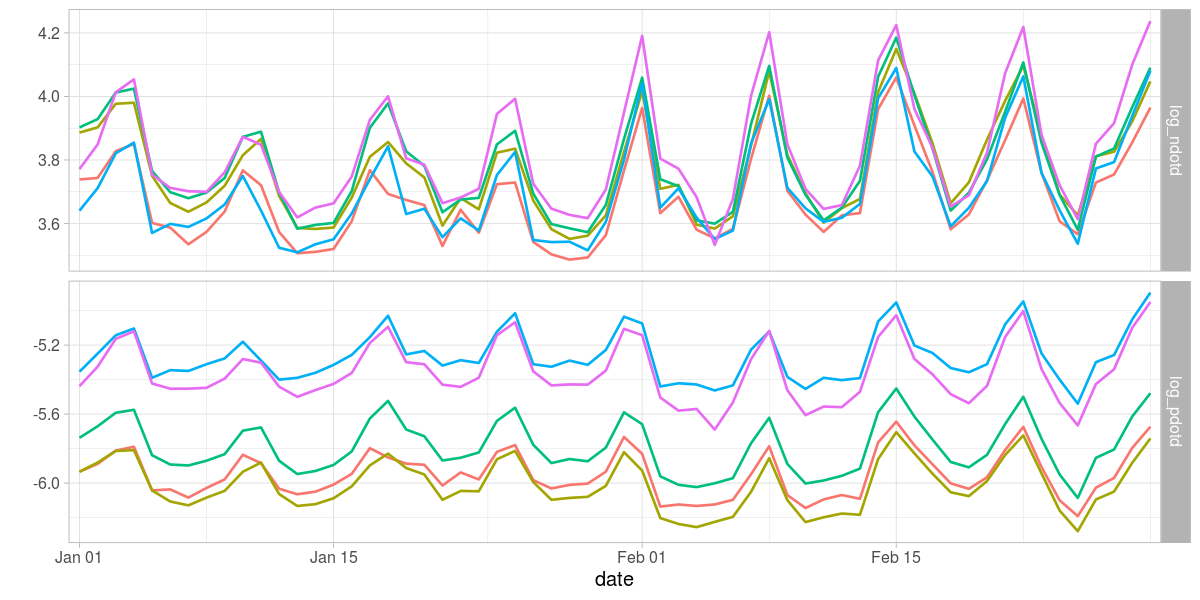

In [216]:
temp %>%
    group_by(date, roq) %>%
    filter(date < as.Date('2020-03-01')) %>%
    summarize(log_ndotd = mean(log(ood)),
              log_pdotd = mean(log(pod))) %>%
    gather(key = 'dv', value = 'value', log_ndotd, log_pdotd) %>%
    ggplot(aes(x = date, y = value, color = as.factor(roq))) +
    geom_line(size = .75) +
    scale_x_date(expand = c(0.01, 0.01)) + 
    facet_grid(dv ~., scales = 'free_y') + 
        ylab('') +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=12),
          legend.position = 'None')

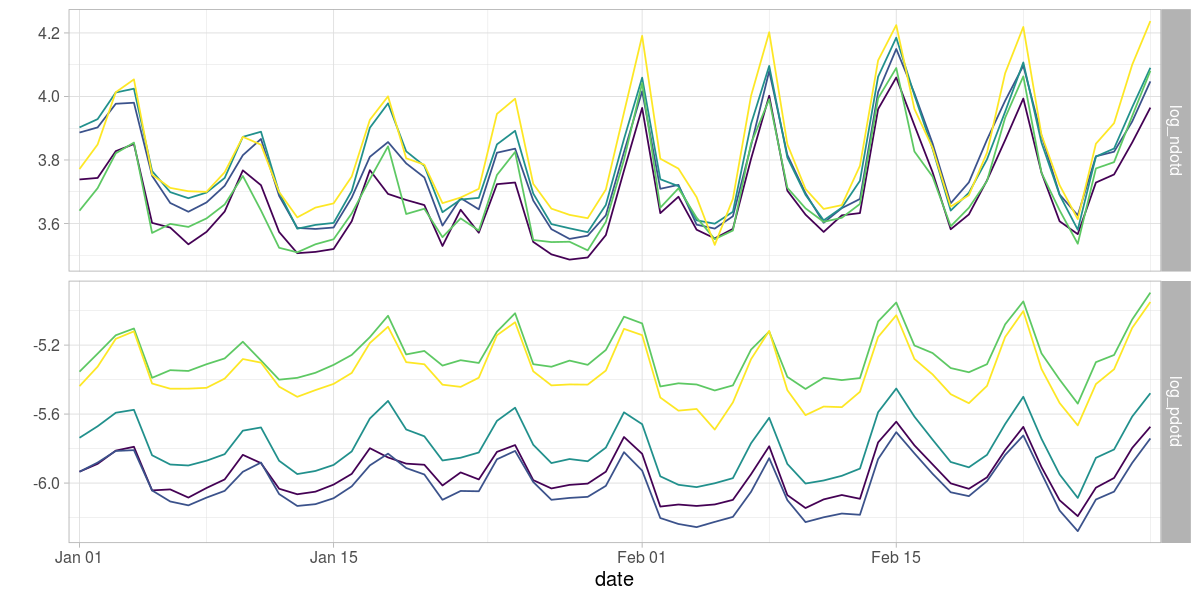